<h1><center>Laboratorio 7: La desperación de Mr. Lepin 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angel Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Jose Ignacio Saffie
- Nombre de alumno 2: Matias Lopez Roman

### **Link de repositorio de GitHub:** `https://github.com/JoseSaffie/MDS7202-1-Primavera-2023.git`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines.
- Aplicar Clusters sobre un conjunto de datos.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio

- Comprender y aprovechar las ventajas que nos ofrece la librería `pandas` con respecto a trabajar en Python 'puro'.
- Crear nuevas características para entrenar un modelo de clustering.
- Comprender como aplicar pipelines de Scikit-Learn para generar procesos más limpios.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [24]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from IPython.display import HTML

# Libreria para plotear (En colab esta desactualizado plotly)
!pip install --upgrade plotly
import plotly.express as px
import plotly.graph_objects as go

!pip install scikit-learn

# Librerias utiles
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Si usted está utilizando Colabolatory le---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
d:\Universidad\Laboratorio de Programacion\MDS7202-1-Primavera-2023\Laboratorios\Lab 7\Lab_07\Laboratorio7_Enunciado.ipynb Cell 9 line 1
import plotly.graph_objects as go
# Librerias utiles
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin

ModuleNotFoundError: No module named 'sklearn' puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

SyntaxError: invalid syntax (3808418733.py, line 2)

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin, en una nueva reunión, le cuenta a ud y su equipo que los resultados derivados del análisis exploratorio de dato presentaron una gran utilidad para la empresa y que tiene un gran entusiasmo por continuar trabajando con ustedes.
Es por esto, que Mr. Lepin les pide que cargue y visualicen algunas de las filas que componen el Dataset.
A continuación un extracto de lo parlamentado en la reunión:

    - Usted: Es un gran logro para nuestro equipo que usted haya encontrado excelente el EDA. ¿Qué tiene en mente ahora?
    - Mr. Lepin: Resulta que hace algún tiempo, mientras tomaba un mojito en una reunión de gerentes en Panamá, oí a un *chato* acerca de **LRMFP**, que es un modelo que permite personificar a los clientes a través de la fabricación de distintos atributos que describen a los clientes. Lo encontré es-tu-pendo ñatito. 
    - Usted: Ehh bueno. Investigaremos acerca de este modelo y veremos lo que podemos hacer.

Por ende, su siguiente tarea es calcular **LRMFP** sobre cada cliente y luego hacer un análisis de las características generadas. Para esto, el área de ventas les entrega un nuevo archivo llamado `online_retail_II_cleaned.pickle`, quien posee los datos del DataFrame original limpios y listos para obtener las características solicitadas por Mr. Lepin.

In [57]:
df_retail = pd.read_pickle("online_retail_II_cleaned.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": "category",
        "Description": str,
        "Customer ID": "category",
        "Country": "category"
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Creación de nuevas Caracteristicas [2 Puntos] 

Como ya se les comento, Mr. Lepin esta interesado en obtener las características **LRMFP**, para esto les señala que estas características se construyen en base a las siguientes definiciones:

- **Length (L)**: Intervalo de tiempo, en días, entre la primera y la última visita del cliente. Mientras mas grande sea el valor, mas fiel es el cliente.

- **Recency (R)**: Indica hace cuanto tiempo el cliente realizo su ultima compra. Notar que para este caso, mientras mas grande es el valor, menos interes posee el usuario para repetir una compra en uno de los locales.

- **Monetary (M)**: El término "monetario" se refiere a la cantidad media de dinero gastada por cada visita del cliente durante el período de observación y refleja la contribución del cliente a los ingresos de la empresa.

- **Frequency (F)**: Se refiere al número total de visitas del cliente durante el periodo de observación. Cuanto mayor sea la frecuencia, mayor será la fidelidad del cliente. 

- **Periodicity (P)**: Representa si los clientes visitan las tiendas con regularidad.

$$Periodicity(n)=std(IVT_1, ..., IVT_n)$$

&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Donde $IVT$ denota el tiempo entre visitas y n representa el número de valores de tiempo entre visitas de un cliente.
 

$$IVT_i=date\_diff(t_{i+1},t)$$

En base a las definiciones señaladas, diseñe una función que permita obtener las características **LRMFP** recibiendo un DataFrame como entrada. Para esto, no estará permitido el uso de iteradores, utilice todas las herramientas que les ofrece `pandas` para realizar esto.

Una referencia que le puede ser útil es el [documento original](https://www.researchgate.net/publication/315979555_LRFMP_model_for_customer_segmentation_in_the_grocery_retail_industry_a_case_study) en donde se propone este método.

**<u>Formato</u> del Resultado Esperado:**

| Customer ID | Length | Recency | Frequency | Monetary | Periodicity |
|------------:|-------:|--------:|----------:|---------:|------------:|
|   12346.0   |    294 |      67 |        46 |   -64.68 |        37.0 |
|   12347.0   |     37 |       3 |        71 |  1323.32 |         0.0 |
|   12349.0   |    327 |      43 |       107 |  2646.99 |        78.0 |
|   12352.0   |     16 |      11 |        18 |   343.80 |         0.0 |
|   12356.0   |     44 |      16 |        84 |  3562.25 |        12.0 |

**Respuesta:**

In [58]:
# Creamos una columna que capture el valor total de la compra
df_retail['Total'] = df_retail['Price']*df_retail['Quantity']

# Primero definimos las funciones para obtener cada características
# Definición de Lenght
def Lenght(df):
    # Pasamos a Fecha
    df['Fecha'] = pd.to_datetime(df['InvoiceDate'])
    # Minimo y Maximo
    min_date = df['Fecha'].min()
    max_date = df['Fecha'].max()
    # Calculamos la diferencia
    diff_dias = (max_date - min_date).days
    return diff_dias

# Creamos una cte para calcular el dia actual
df_retail["Fecha"] = pd.to_datetime(df_retail['InvoiceDate'])
now_day = df_retail["Fecha"].max()

# Definición de Recency
def Recency(df):
    # Pasamos a fecha
    df['Fecha'] = pd.to_datetime(df['InvoiceDate'])
    # Tomamos la fecha constante que teniamos
    # now_day
    # Ultima compra del cliente
    last_buy = df['Fecha'].max()
    # Calculamos la diferencia
    diff_dias = (now_day - last_buy).days
    return diff_dias + 1


# Definición de Monetary # Tengo dudas
def Monetary(df):
    prom_gasto_diario = df["Total"].mean()
    prom_gasto_diario = round( prom_gasto_diario, 2)
    return prom_gasto_diario


# Definción de Frequency 
def Frequency(df):
    conteo = df['InvoiceDate'].count()
    return conteo

# Definición de Periodicity
def Periodicity(df):
    # Pasamos a fecha
    df['Fecha'] = pd.to_datetime(df['InvoiceDate'])
    # Calcula la dif entre fechas adyacentes
    df['Intervalo'] = df['Fecha'].diff()
    std_p =  df['Intervalo'].std().days
    return std_p




def custom_features(dataframe_in):
    # Agrupamos
    Agrupado = dataframe_in.groupby('Customer ID')
    
    # Luego aplicamos la funcion para obtener cada parametros
    L_p = Agrupado.apply(Lenght)    
    R_p = Agrupado.apply(Recency)
    F_p = Agrupado.apply(Frequency)
    M_p = Agrupado.apply(Monetary)
    P_p = Agrupado.apply(Periodicity)

    # Concatenamos cada resultado 
    dataframe_out = pd.concat([L_p, R_p, F_p, M_p, P_p], axis=1)
    
    # Les asignamos nombres
    dataframe_out.columns = ['Lenght', 'Recency', 'Frequency','Monetary', 'Periodicity']

    return dataframe_out


    pass

In [51]:
df_retail_custom = custom_features(df_retail)

**Resúesta de Pauta:**

## 1.3 Pipelines 👷

Finalmente *Don Mora* le pregunta si seria posible realizar un pipeline para realizar una segmentación de los clientes con los nuevos datos generados, a lo que usted responde que **sí** y propone la utilización de k-means para la segmentación.

A continuación siga los pasos requeridos para obtener la segmentación de clientes.

### 1.3.1 Estandarizar Caracteristicas [0.5 puntos]

Construya una clase llamada ``MinMax()`` utilizando ``BaseEstimator`` y ``TransformerMixin`` para realizar una transformación de cada una de las columnas de un DataFrame utilizando ``ColumnTransformer()`` más tarde (tome como referencia el siguiente [enlace](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer)).


 Para esto considere que Min-Max escaler queda dada por la ecuación:

$$MinMax = \dfrac{x-min(x)}{max(x) - min(x)}$$

Con esto buscamos que los valores que componen a las columnas se muevan en el rango de valores $[0, 1]$.

**Respuesta:**

In [52]:
class MinMax(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.min_values = None
        self.max_values = None

    def fit(self, X, y=None):
        # Guardamos los valores mínimos y máximos de cada columna
        self.min_values = X.min()
        self.max_values = X.max()
        return self

    def transform(self, X):
        transformed_data = pd.DataFrame()
        for column in X.columns: # Aplicamos la transformación Min-Max a cada columna del DataFrame
            transformed_data[column] = (X[column] - self.min_values[column]) / (self.max_values[column] - self.min_values[column]) #ocupamos formula del enunciado
        return transformed_data

In [53]:
# Crear una instancia de la clase MinMax
min_max_transformer = MinMax()

# aplicamos el ajuste a los datos que tienen las caracteristicas LRMFP
min_max_transformer.fit(df_retail_custom)

# Transformar los datos de df utilizando el transformer entrenado
data_transformed = min_max_transformer.transform(df_retail_custom)



In [55]:
data_transformed.head()

,Lenght,Recency,Frequency,Monetary,Periodicity
Customer ID,,,,,
12346.0,0.525469,0.439678,0.005748,0.001032,0.116022
12347.0,0.099196,0.005362,0.012574,0.001702,0.022099
12348.0,0.000000,0.195710,0.003413,0.001014,0.000000
12349.0,0.485255,0.112601,0.018143,0.002391,0.088398
12351.0,0.000000,0.026810,0.003593,0.001308,0.000000


### 1.3.2 `T-SNE` Pipeline [1.0 puntos]

Para comenzar introduciéndose en el uso de pipeline, decide probar realizando un pipeline enfocado en la reducción de dimensionalidad y así hacer no decepcionar a Mr. Lepin con la clusterización del modelo. 

Configure un pipeline utilizando el algoritmo `T-SNE` sobre los datos **LRMFP**, donde, para la realización del pipeline considera los siguientes pasos:

1. Como primer paso obtenga las características **LRMFP** desde el DataFrame ``df_retail_II_cleaned.pickle`` utilizando la función ``custom_features`` creada anteriormente, junto a ``FunctionTransformer()``. Considere esto como el primer paso de su pipeline.
2. En segundo lugar usando ``ColumnTransformer()`` aplique el MinxMax scaler creado por usted sobre todas las columnas generadas en el paso anterior. 
3. Finalmente, aplique un último paso donde obtiene las 2 componentes más relevantes utilizando el algoritmo `T-SNE` de sckit-learn.

Tras aplicar las transformaciones sobre el dataset **LRMFP**, gráfique las componentes obtenidas en la reducción de dimensionalidad.

**Respuesta:**

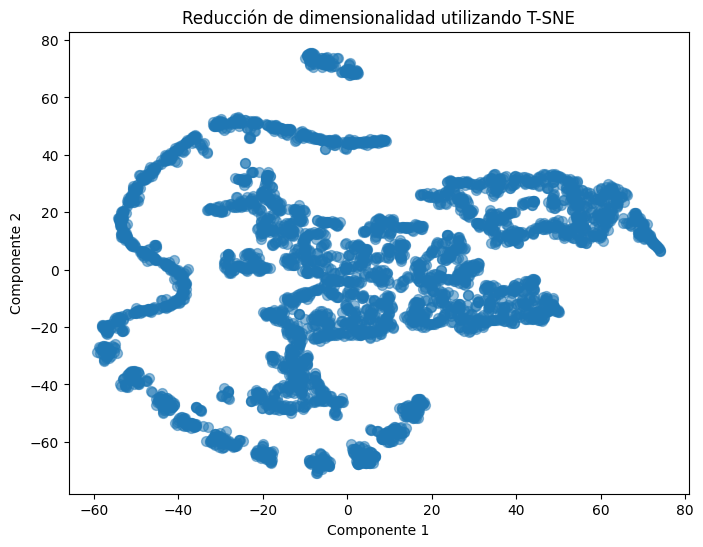

In [59]:
import matplotlib.pyplot as plt

# Definir la función para obtener las características LRMFP usando FunctionTransformer
LRMFP = FunctionTransformer(func=custom_features, validate=False)

# Aplicamos la funcion a df_retail para obtener un nuevo dataset con las caracteristicas LRMFP
df_features = LRMFP.transform(df_retail)

df_features = df_features.dropna() #eliminamos posibles vacios

#Aplicamos MinMaxScaler a todas las columnas de df_features con la funcion ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('minmax_scaler', MinMax(), df_features.columns)  # Aplicar MinMaxScaler a todas las columnas
    ]
)

# Obtenemos a traves del pipeline las 2 componentes más relevantes utilizando T-SNE
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('tsne', TSNE(n_components=2))  
])

# Aplicar el pipeline sobre la base de datos 
tsne_components = pipeline.fit_transform(df_features)

# Gráficar las componentes obtenidas en la reducción de dimensionalidad
plt.figure(figsize=(8, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], marker='o', s=50, alpha=0.5)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Reducción de dimensionalidad utilizando T-SNE')
plt.show()


### 1.3.3 Clustering

#### 1.3.3.1 Método del Codo [1 puntos]

Utilizando la clase creada para escalamiento, aplique el método del codo para visualizar cual es el número de clusters que mejor se ajustan a los datos. Realice esto utilizando el algoritmo K-means dentro de un pipeline para un $k \in [1,20]$, donde k representa el número de clusters del k-means. Para la realización de esta sección y la próxima (1.3.3.2), considere los mismos pasos utilizados para el t-sne, pero **permutando el algoritmo de reducción de dimensionalidad por k-means.**

A través del grafico obtenido, comente y justifique que valor de k escogería para realizar el k-means.

**Respuesta:**

d:\Universidad\Laboratorio de Programacion\MDS7202-1-Primavera-2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Universidad\Laboratorio de Programacion\MDS7202-1-Primavera-2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Universidad\Laboratorio de Programacion\MDS7202-1-Primavera-2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Universidad\Laboratorio d

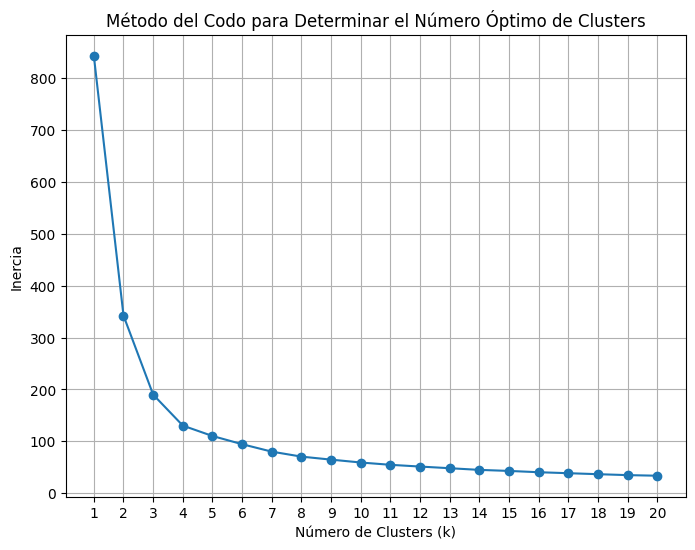

In [60]:
# Definir la función para obtener las características LRMFP usando FunctionTransformer
LRMFP = FunctionTransformer(func=custom_features, validate=False)


df_features = LRMFP.transform(df_retail)

df_features = df_features.dropna()


preprocessor = ColumnTransformer(
    transformers=[
        ('minmax_scaler', MinMax(), df_features.columns)  
    ]
)

#Agregamos lista vacia para obtener las inercias para el metodo del codo segun los diferentes valores de k 
inertia_values = []
for k in range(1, 21):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('kmeans', KMeans(n_clusters=k, random_state=42)) #ahora ocupamos kmeans en vez de TSNE
    ])
    pipeline.fit(df_features)
    inertia_values.append(pipeline.named_steps['kmeans'].inertia_)

# Graficar la inercia en función de k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), inertia_values, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


A partir del grafico se puede observar que el punto donde la inercia deja de disminuir a un paso acelarado es cuando k equivale a 4. Dado esto, se puede decir que con k = 4 lo compacto que estan los puntos dentro de los clusters no varia significativamente si aumentamosel k.

#### 1.3.3.2 Segmentación de Clientes con K-Means 🎁 [1 punto]

En base a la elección de k realizada en la sección anterior, utilice este valor escogido y entrene un modelo de K-means utilizando el mismo pipeline de scikit-learn utilizado anteriormente.

Una vez ajustado los datos, genere una tabla con los promedios (o medianas) para cada uno de los atributos, agrupando estos por el clúster que pertenecen. ¿Es posible observar agrupaciones coherentes?, ¿Qué tipo de clientes posee el retail?, Justifique su respuesta y no decepcione a Mr. Lepin.


**Respuesta:**







In [61]:
# Utilizar el valor de k escogido
k = 4

# Definir el pipeline con el número óptimo de clusters
kmeans_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=k, random_state=42))
])

# Entrenar el modelo K-means
kmeans_pipeline.fit(df_features)

# Obtener las etiquetas de los clusters para cada muestra en df_features
cluster_labels = kmeans_pipeline.predict(df_features)

# Crear una nueva columna en df_features para las etiquetas de los clusters
df_features['Cluster'] = cluster_labels

cluster_means = df_features.groupby('Cluster').agg('mean')

cluster_means


d:\Universidad\Laboratorio de Programacion\MDS7202-1-Primavera-2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Lenght,Recency,Frequency,Monetary,Periodicity
Cluster,,,,,
0,18.150246,51.072250,42.601806,23.242299,2.362890
1,319.146953,23.731183,210.738351,35.624014,19.721326
2,19.257212,254.965144,28.923077,25.534387,3.042067
3,182.255000,67.517000,89.607000,25.650880,20.576000


Cluster 0: En este cluster se observa un cliente que tuvo un periodo de relacion promedio con la tienda corto (18 dias), sin embargo en este corto periodo de tiempo fue bastantes veces a la tienda (42), es decir, en promedio 2 veces al dia. Por otra parte, su ultima visita fue en promedio hace 1 mes y medio. Estos 3 factores pueden indicar que este es un tipo de cliente que tiene una relacion reciente con la tienda y puede volver a comprar. 

Cluster 1: En este cluster se observa un cliente que tuvo un periodo de relacion promedio con la tienda muy largo (319 días), es decir, clientes fieles. Ademas han visitado en promedio 210 veces la tienda y su ticket promedio de compra es de 35, el mas alto entre los 4 cluster. Esto indica que este tipo de cliente es fiel y compra mas productos en la tienda, sin embargo sus patrones de compra no son tan regulares (19 - Periodicity)

Cluster 2: En este cluster se observa un cliente que tuvo un periodo de relacion promedio con la tienda corto (19 días) y su ultima visita fue hace 254 dias, lo que indica que compro un tiempo y no volvio mas. Su ticket promedio de compra fue relativamente elevado  (25.53). Este cliente tiene pocas probabilidades de volver. 

Cluster 3: En este cluster se observa un cliente que tuvo un periodo de relacion promedio con la tienda moderadamente largo (182 días) y una frecuencia de compra alta (89.61),es decir, aproximadamente 2 veces al dia. Tienen un valor monetario promedio alto (25.65) y una periodicidad alta (20.58). Esto sugiere clientes que han estado en la tienda por un tiempo significativo y presentan variabilidad en los intervalos entre las compras.

En resumen, el retail posee los siguientes tipos de clientes:

Cluster 0: Clientes nuevos que compran con frecuencia y tienen una periodicidad estable.

Cluster 1: Clientes fieles que compran con alta frecuencia, pero con variabilidad en sus patrones de compra.

Cluster 2: Clientes que probablemente no vuelvan (poco fieles) y que realizaron compras de valor moderado.

Cluster 3: Clientes fieles que compran con frecuencia moderada y presentan variabilidad en sus patrones de compra.

**Respuesta Esperada:**

|         | Length  | Recency   | Frequency | Monetary | Periodicity |       |
|---------|---------|-----------|----------|-------------|-------|-------|
| Cluster |         |           |          |             |       |       |
|    0    |   258.8 |      45.2 |     76.1 |      1107.7 | 107.6 |   449 |
|    1    |    76.1 |     217.6 |     45.5 |       791.7 |  14.1 |   466 |
|    2    |   368.5 |       4.8 |   2715.0 |    226621.6 |   4.2 |     4 |
|    3    |    85.3 |      45.7 |     65.8 |      1047.0 |  10.5 |   987 |
|    4    |   347.2 |      15.9 |   1658.0 |     35829.3 |   8.0 |    25 |
|    5    |   298.0 |      29.8 |    183.8 |      3639.9 |  32.0 |  1188 |

#### 1.3.3.3 Plot de K-Means 📈 [0.5 puntos]



Por último, Mr. Lepin, impaciente de no entender lo que usted intenta explicarle, le solicita que por favor muestre algún resultado "visual" de los grupos encontrados.

Para esto, grafique nuevamente las características encontradas usando `T-SNE` (no calcule de nuevo, simplemente utilice las proyecciones encontradas) y agregue las labels calculadas con kmeans como el argumento `color`.   

Comente: ¿Se separan bien los distintos clusters en la visualización?


**Respuesta:**

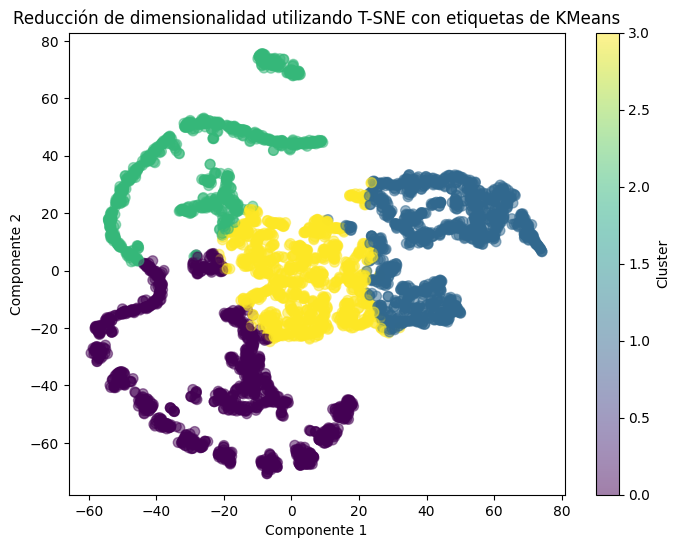

In [62]:
# Graficar las características encontradas usando T-SNE con las etiquetas de KMeans como color
plt.figure(figsize=(8, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=50, alpha=0.5)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Reducción de dimensionalidad utilizando T-SNE con etiquetas de KMeans')
plt.colorbar(label='Cluster')
plt.show()

A partir del grafico,se puede observar que los diferentes cluster no se separan correctammente, puesto que no hay un espacio significativo de separacion entre ellos, es decir, en algunos casos no se distingue o interpreta correctamente donde termina uno y empieza otro. Esto indica, que hay que revisar las caracteristicas utilizadas para el clustering y que probablemente los valores promedios obtenidos anteriormente no sean del todo correcto.

En detalle, vemos que hay zonas del cluster azul que al parecer podrian pertenecer al cluster amarillo. Esto se puede deber a que los clientes tienen leves diferencia que son dificiles de capturar y que se superponen al obtener las caracteristicas.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por correo, Discord o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>